
<a class="anchor" id="import"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">Import Libraries  </div>

In [129]:
!pip install hnswlib  --quiet
!pip install shap gradio --quiet

In [130]:
#  Import libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
import hnswlib

from sklearn import preprocessing
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import shap

# Suppress warnings
warnings.filterwarnings("ignore")

<a class="anchor" id="load_data"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">Load dataset</div>

In [131]:
# prompt: Use alternative encoding UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 1499: invalid start byte

import pandas as pd

df = pd.read_csv('../data/fy2022_archived_opportunities.csv', encoding='latin-1', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323030 entries, 97ec6ab3d5d4454192a8828827de6f2f to 4aabc1ad68094f32b4990846e2995dc2
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Title                     323030 non-null  object 
 1   Sol#                      320224 non-null  object 
 2   Department/Ind.Agency     323022 non-null  object 
 3   CGAC                      323022 non-null  float64
 4   Sub-Tier                  322639 non-null  object 
 5   FPDS Code                 323022 non-null  object 
 6   Office                    323005 non-null  object 
 7   AAC Code                  320348 non-null  object 
 8   PostedDate                323030 non-null  object 
 9   Type                      323030 non-null  object 
 10  BaseType                  323030 non-null  object 
 11  ArchiveType               323030 non-null  object 
 12  ArchiveDate               286692 non-null  objec

In [132]:
df

,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,Type,...,SecondaryContactPhone,SecondaryContactFax,OrganizationType,State,City,ZipCode,CountryCode,AdditionalInfoLink,Link,Description
NoticeId,,,,,,,,,,,,,,,,,,,,,
97ec6ab3d5d4454192a8828827de6f2f,Whooster Web-Based Software,HQ003422P0171,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 23:09:21.289-04,Award Notice,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/97ec6ab3d5d4454192a8828827...,The Whooster Web Based Software contract is a ...
c15a7148317b44eeac210a7b64068765,Beckman Coulter Reagents and Supplies for Gove...,W81K0222Q0162,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W40M RHCO PACIFIC,W81K02,2022-09-30 23:01:45.502-04,Presolicitation,...,NaN,NaN,OFFICE,HI,FORT SHAFTER,96858-5098,USA,NaN,https://sam.gov/opp/c15a7148317b44eeac210a7b64...,The Medical Readiness Contracting Office  Pac...
bf103afa7b4b455bb1541eb450e38128,8(a) WebEOC IL5 Cloud Services and IT Support,HQ003422C0130,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 22:12:14.082-04,Award Notice,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/bf103afa7b4b455bb1541eb450...,Direct Award of an 8(a) contract for WebEOC IL...
d1619b0084ac4d439585b727343b4659,Leslie Valve IDIQ - Sources Sought,N4523A22RC04N81,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,PUGET SOUND NAVAL SHIPYARD IMF,N4523A,2022-09-30 22:05:45.599-04,Sources Sought,...,3609793943,NaN,OFFICE,WA,BREMERTON,98314-5001,USA,NaN,https://sam.gov/opp/d1619b0084ac4d439585b72734...,Puget Sound Naval Shipyard and Intermediate Ma...
48b6b27846bd4155990cdc2f2be335c5,PFPA BALLISTIC VEST AND PLATES,HQ003422Q0206,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 21:36:36.954-04,Award Notice,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/48b6b27846bd4155990cdc2f2b...,This blanket purchase agreement (BPA) has been...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f5c5ffbcf544822897d81adf4d48a31,"Lease Vehicles for Marine Corps Base Butler, S...",N4008421T2004,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,NAVAL FAC ENGINEERING CMD FAR EAST,N40084,2021-10-01 01:10:15.569-04,Solicitation,...,0989704153,NaN,OFFICE,AP,FPO,96349-0013,USA,NaN,https://sam.gov/opp/9f5c5ffbcf544822897d81adf4...,The Contractor shall provide qualified personn...
2e2ab5512120475dba81379f508400d9,Replace Perimeter Boundary Wall at Camp Walker,W90VN921R0094,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,411TH CONTRACTING SUPORT BRIGAGE AU,W91QVN,2021-10-01 00:20:35.287-04,Combined Synopsis/Solicitation,...,NaN,NaN,OFFICE,AP,APO,96271-5289,USA,NaN,https://sam.gov/opp/2e2ab5512120475dba81379f50...,"REPLACE PERIMETER BOUNDARY WALL, CAMP WALKER A..."
bb24f68bc7e542c7bf1301c44fd0b1ff,"Monaco Upgrade, McConnell AFB",FA462121P0062,DEPT OF DEFENSE,57.0,DEPT OF THE AIR FORCE,5700,FA4621 22 CONS PK,FA4621,2021-10-01 00:12:23.278-04,Justification,...,NaN,NaN,OFFICE,KS,MCCONNELL AFB,67221-3702,USA,NaN,https://sam.gov/opp/bb24f68bc7e542c7bf1301c44f...,The 22 CES requires Technology Upgrade service...


In [133]:
df

,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,Type,...,SecondaryContactPhone,SecondaryContactFax,OrganizationType,State,City,ZipCode,CountryCode,AdditionalInfoLink,Link,Description
NoticeId,,,,,,,,,,,,,,,,,,,,,
97ec6ab3d5d4454192a8828827de6f2f,Whooster Web-Based Software,HQ003422P0171,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 23:09:21.289-04,Award Notice,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/97ec6ab3d5d4454192a8828827...,The Whooster Web Based Software contract is a ...
c15a7148317b44eeac210a7b64068765,Beckman Coulter Reagents and Supplies for Gove...,W81K0222Q0162,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W40M RHCO PACIFIC,W81K02,2022-09-30 23:01:45.502-04,Presolicitation,...,NaN,NaN,OFFICE,HI,FORT SHAFTER,96858-5098,USA,NaN,https://sam.gov/opp/c15a7148317b44eeac210a7b64...,The Medical Readiness Contracting Office  Pac...
bf103afa7b4b455bb1541eb450e38128,8(a) WebEOC IL5 Cloud Services and IT Support,HQ003422C0130,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 22:12:14.082-04,Award Notice,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/bf103afa7b4b455bb1541eb450...,Direct Award of an 8(a) contract for WebEOC IL...
d1619b0084ac4d439585b727343b4659,Leslie Valve IDIQ - Sources Sought,N4523A22RC04N81,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,PUGET SOUND NAVAL SHIPYARD IMF,N4523A,2022-09-30 22:05:45.599-04,Sources Sought,...,3609793943,NaN,OFFICE,WA,BREMERTON,98314-5001,USA,NaN,https://sam.gov/opp/d1619b0084ac4d439585b72734...,Puget Sound Naval Shipyard and Intermediate Ma...
48b6b27846bd4155990cdc2f2be335c5,PFPA BALLISTIC VEST AND PLATES,HQ003422Q0206,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 21:36:36.954-04,Award Notice,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/48b6b27846bd4155990cdc2f2b...,This blanket purchase agreement (BPA) has been...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f5c5ffbcf544822897d81adf4d48a31,"Lease Vehicles for Marine Corps Base Butler, S...",N4008421T2004,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,NAVAL FAC ENGINEERING CMD FAR EAST,N40084,2021-10-01 01:10:15.569-04,Solicitation,...,0989704153,NaN,OFFICE,AP,FPO,96349-0013,USA,NaN,https://sam.gov/opp/9f5c5ffbcf544822897d81adf4...,The Contractor shall provide qualified personn...
2e2ab5512120475dba81379f508400d9,Replace Perimeter Boundary Wall at Camp Walker,W90VN921R0094,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,411TH CONTRACTING SUPORT BRIGAGE AU,W91QVN,2021-10-01 00:20:35.287-04,Combined Synopsis/Solicitation,...,NaN,NaN,OFFICE,AP,APO,96271-5289,USA,NaN,https://sam.gov/opp/2e2ab5512120475dba81379f50...,"REPLACE PERIMETER BOUNDARY WALL, CAMP WALKER A..."
bb24f68bc7e542c7bf1301c44fd0b1ff,"Monaco Upgrade, McConnell AFB",FA462121P0062,DEPT OF DEFENSE,57.0,DEPT OF THE AIR FORCE,5700,FA4621 22 CONS PK,FA4621,2021-10-01 00:12:23.278-04,Justification,...,NaN,NaN,OFFICE,KS,MCCONNELL AFB,67221-3702,USA,NaN,https://sam.gov/opp/bb24f68bc7e542c7bf1301c44f...,The 22 CES requires Technology Upgrade service...


In [134]:
df.columns

Index(['Title', 'Sol#', 'Department/Ind.Agency', 'CGAC', 'Sub-Tier',
       'FPDS Code', 'Office', 'AAC Code', 'PostedDate', 'Type', 'BaseType',
       'ArchiveType', 'ArchiveDate', 'SetASideCode', 'SetASide',
       'ResponseDeadLine', 'NaicsCode', 'ClassificationCode',
       'PopStreetAddress', 'PopCity', 'PopState', 'PopZip', 'PopCountry',
       'Active', 'AwardNumber', 'AwardDate', 'Award$', 'Awardee',
       'PrimaryContactTitle', 'PrimaryContactFullname', 'PrimaryContactEmail',
       'PrimaryContactPhone', 'PrimaryContactFax', 'SecondaryContactTitle',
       'SecondaryContactFullname', 'SecondaryContactEmail',
       'SecondaryContactPhone', 'SecondaryContactFax', 'OrganizationType',
       'State', 'City', 'ZipCode', 'CountryCode', 'AdditionalInfoLink', 'Link',
       'Description'],
      dtype='object')

In [135]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
import matplotlib.pyplot as plt

# Function to clean column names
def clean_names(df):
    """
    Cleans column names of a Pandas DataFrame by removing special characters,
    converting to lowercase, and replacing spaces with underscores.

    Args:
        df: Pandas DataFrame

    Returns:
        Pandas DataFrame with cleaned column names.
    """
    df.columns = [re.sub(r'\W+', '_', col).lower() for col in df.columns]
    return df

# Load your DataFrame
# df2023 = pd.read_csv('your_dataset.csv')  # Replace with your actual data loading method

# Clean column names
df2023 = clean_names(df2023)

# List of categorical columns
categorical_cols = ['title', 'sol_', 'department_ind_agency', 'sub_tier', 'fpds_code', 'office', 'aac_code', 
                    'posteddate', 'type', 'basetype', 'archivetype', 'archivedate', 'setasidecode', 'setaside', 
                    'responsedeadline', 'naicscode', 'classificationcode', 'popstreetaddress', 'popcity', 
                    'popstate', 'popzip', 'popcountry', 'active', 'awardnumber', 'awarddate', 'awardee', 
                    'primarycontacttitle', 'primarycontactfullname', 'primarycontactemail', 'primarycontactphone', 
                    'primarycontactfax', 'secondarycontacttitle', 'secondarycontactfullname', 'secondarycontactemail', 
                    'secondarycontactphone', 'secondarycontactfax', 'organizationtype', 'state', 'city', 'zipcode', 
                    'countrycode', 'additionalinfolink', 'link', 'description']

# Convert all categorical columns to strings
df2023[categorical_cols] = df2023[categorical_cols].astype(str)

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df2023[col] = le.fit_transform(df2023[col])
    label_encoders[col] = le

# Ensure numerical columns are in the correct format
df2023['cgac'] = pd.to_numeric(df2023['cgac'], errors='coerce')

In [136]:
df2023.columns

Index(['title', 'sol_', 'department_ind_agency', 'cgac', 'sub_tier',
       'fpds_code', 'office', 'aac_code', 'posteddate', 'type', 'basetype',
       'archivetype', 'archivedate', 'setasidecode', 'setaside',
       'responsedeadline', 'naicscode', 'classificationcode',
       'popstreetaddress', 'popcity', 'popstate', 'popzip', 'popcountry',
       'active', 'awardnumber', 'awarddate', 'award_', 'awardee',
       'primarycontacttitle', 'primarycontactfullname', 'primarycontactemail',
       'primarycontactphone', 'primarycontactfax', 'secondarycontacttitle',
       'secondarycontactfullname', 'secondarycontactemail',
       'secondarycontactphone', 'secondarycontactfax', 'organizationtype',
       'state', 'city', 'zipcode', 'countrycode', 'additionalinfolink', 'link',
       'description'],
      dtype='object')

XGBoost MSE: 8.14830757002135e+16, R2: -1.0919277485859071


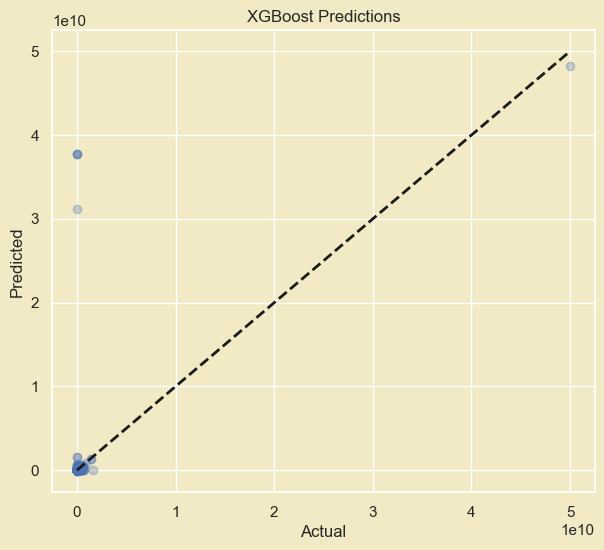

In [137]:

df2023['award_'] = pd.to_numeric(df2023['award_'], errors='coerce')

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df2023_imputed = pd.DataFrame(imputer.fit_transform(df2023), columns=df2023.columns)

# Define features and target
X = df2023_imputed.drop(columns=['award_'])
y = df2023_imputed['award_']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"XGBoost MSE: {xgb_mse}, R2: {xgb_r2}")

# Plot the results
plt.figure(figsize=(7, 6))
plt.scatter(y_test, xgb_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Predictions')
plt.show()

In [138]:
import pandas as pd

def clean_column_names(df):
    # Replace spaces and slashes with underscores
    df.columns = [col.replace(' ', '_').replace('/', '_') for col in df.columns]
    # Convert to lowercase
    df.columns = [col.lower() for col in df.columns]
    return df

# Assuming df2023 is your DataFrame
df2023 = clean_column_names(df)
df2023.columns

Index(['title', 'sol#', 'department_ind.agency', 'cgac', 'sub-tier',
       'fpds_code', 'office', 'aac_code', 'posteddate', 'type', 'basetype',
       'archivetype', 'archivedate', 'setasidecode', 'setaside',
       'responsedeadline', 'naicscode', 'classificationcode',
       'popstreetaddress', 'popcity', 'popstate', 'popzip', 'popcountry',
       'active', 'awardnumber', 'awarddate', 'award$', 'awardee',
       'primarycontacttitle', 'primarycontactfullname', 'primarycontactemail',
       'primarycontactphone', 'primarycontactfax', 'secondarycontacttitle',
       'secondarycontactfullname', 'secondarycontactemail',
       'secondarycontactphone', 'secondarycontactfax', 'organizationtype',
       'state', 'city', 'zipcode', 'countrycode', 'additionalinfolink', 'link',
       'description'],
      dtype='object')

In [139]:
def separate_columns(df):
    # Identify categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

    return categorical_cols, numerical_cols

# Assuming df2023 is your DataFrame (already cleaned)
categorical_columns, numerical_columns = separate_columns(df2023)

print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
numerical_columns

Categorical Columns:
['title', 'sol#', 'department_ind.agency', 'sub-tier', 'fpds_code', 'office', 'aac_code', 'posteddate', 'type', 'basetype', 'archivetype', 'archivedate', 'setasidecode', 'setaside', 'responsedeadline', 'naicscode', 'classificationcode', 'popstreetaddress', 'popcity', 'popstate', 'popzip', 'popcountry', 'active', 'awardnumber', 'awarddate', 'award$', 'awardee', 'primarycontacttitle', 'primarycontactfullname', 'primarycontactemail', 'primarycontactphone', 'primarycontactfax', 'secondarycontacttitle', 'secondarycontactfullname', 'secondarycontactemail', 'secondarycontactphone', 'secondarycontactfax', 'organizationtype', 'state', 'city', 'zipcode', 'countrycode', 'additionalinfolink', 'link', 'description']

Numerical Columns:


['cgac']

In [140]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define categorical columns
categorical_cols = categorical_columns

# One-hot encode categorical variables
encoder = OneHotEncoder()

In [141]:
encoder

OneHotEncoder()

In [142]:
df2023

,title,sol#,department_ind.agency,cgac,sub-tier,fpds_code,office,aac_code,posteddate,type,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
NoticeId,,,,,,,,,,,,,,,,,,,,,
97ec6ab3d5d4454192a8828827de6f2f,Whooster Web-Based Software,HQ003422P0171,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 23:09:21.289-04,Award Notice,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/97ec6ab3d5d4454192a8828827...,The Whooster Web Based Software contract is a ...
c15a7148317b44eeac210a7b64068765,Beckman Coulter Reagents and Supplies for Gove...,W81K0222Q0162,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W40M RHCO PACIFIC,W81K02,2022-09-30 23:01:45.502-04,Presolicitation,...,NaN,NaN,OFFICE,HI,FORT SHAFTER,96858-5098,USA,NaN,https://sam.gov/opp/c15a7148317b44eeac210a7b64...,The Medical Readiness Contracting Office  Pac...
bf103afa7b4b455bb1541eb450e38128,8(a) WebEOC IL5 Cloud Services and IT Support,HQ003422C0130,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 22:12:14.082-04,Award Notice,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/bf103afa7b4b455bb1541eb450...,Direct Award of an 8(a) contract for WebEOC IL...
d1619b0084ac4d439585b727343b4659,Leslie Valve IDIQ - Sources Sought,N4523A22RC04N81,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,PUGET SOUND NAVAL SHIPYARD IMF,N4523A,2022-09-30 22:05:45.599-04,Sources Sought,...,3609793943,NaN,OFFICE,WA,BREMERTON,98314-5001,USA,NaN,https://sam.gov/opp/d1619b0084ac4d439585b72734...,Puget Sound Naval Shipyard and Intermediate Ma...
48b6b27846bd4155990cdc2f2be335c5,PFPA BALLISTIC VEST AND PLATES,HQ003422Q0206,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 21:36:36.954-04,Award Notice,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/48b6b27846bd4155990cdc2f2b...,This blanket purchase agreement (BPA) has been...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f5c5ffbcf544822897d81adf4d48a31,"Lease Vehicles for Marine Corps Base Butler, S...",N4008421T2004,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,NAVAL FAC ENGINEERING CMD FAR EAST,N40084,2021-10-01 01:10:15.569-04,Solicitation,...,0989704153,NaN,OFFICE,AP,FPO,96349-0013,USA,NaN,https://sam.gov/opp/9f5c5ffbcf544822897d81adf4...,The Contractor shall provide qualified personn...
2e2ab5512120475dba81379f508400d9,Replace Perimeter Boundary Wall at Camp Walker,W90VN921R0094,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,411TH CONTRACTING SUPORT BRIGAGE AU,W91QVN,2021-10-01 00:20:35.287-04,Combined Synopsis/Solicitation,...,NaN,NaN,OFFICE,AP,APO,96271-5289,USA,NaN,https://sam.gov/opp/2e2ab5512120475dba81379f50...,"REPLACE PERIMETER BOUNDARY WALL, CAMP WALKER A..."
bb24f68bc7e542c7bf1301c44fd0b1ff,"Monaco Upgrade, McConnell AFB",FA462121P0062,DEPT OF DEFENSE,57.0,DEPT OF THE AIR FORCE,5700,FA4621 22 CONS PK,FA4621,2021-10-01 00:12:23.278-04,Justification,...,NaN,NaN,OFFICE,KS,MCCONNELL AFB,67221-3702,USA,NaN,https://sam.gov/opp/bb24f68bc7e542c7bf1301c44f...,The 22 CES requires Technology Upgrade service...


In [143]:
df2023.columns

Index(['title', 'sol#', 'department_ind.agency', 'cgac', 'sub-tier',
       'fpds_code', 'office', 'aac_code', 'posteddate', 'type', 'basetype',
       'archivetype', 'archivedate', 'setasidecode', 'setaside',
       'responsedeadline', 'naicscode', 'classificationcode',
       'popstreetaddress', 'popcity', 'popstate', 'popzip', 'popcountry',
       'active', 'awardnumber', 'awarddate', 'award$', 'awardee',
       'primarycontacttitle', 'primarycontactfullname', 'primarycontactemail',
       'primarycontactphone', 'primarycontactfax', 'secondarycontacttitle',
       'secondarycontactfullname', 'secondarycontactemail',
       'secondarycontactphone', 'secondarycontactfax', 'organizationtype',
       'state', 'city', 'zipcode', 'countrycode', 'additionalinfolink', 'link',
       'description'],
      dtype='object')

In [144]:
df2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323030 entries, 97ec6ab3d5d4454192a8828827de6f2f to 4aabc1ad68094f32b4990846e2995dc2
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   title                     323030 non-null  object 
 1   sol#                      320224 non-null  object 
 2   department_ind.agency     323022 non-null  object 
 3   cgac                      323022 non-null  float64
 4   sub-tier                  322639 non-null  object 
 5   fpds_code                 323022 non-null  object 
 6   office                    323005 non-null  object 
 7   aac_code                  320348 non-null  object 
 8   posteddate                323030 non-null  object 
 9   type                      323030 non-null  object 
 10  basetype                  323030 non-null  object 
 11  archivetype               323030 non-null  object 
 12  archivedate               286692 non-null  objec

In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame
# df2023 = pd.read_csv('your_dataset.csv')  # Replace with your actual data loading method

# List of categorical columns
categorical_cols = ['title', 'sol#', 'department_ind.agency', 'sub-tier', 'fpds_code', 'office', 'aac_code', 
                    'posteddate', 'type', 'basetype', 'archivetype', 'archivedate', 'setasidecode', 'setaside', 
                    'responsedeadline', 'naicscode', 'classificationcode', 'popstreetaddress', 'popcity', 
                    'popstate', 'popzip', 'popcountry', 'active', 'awardnumber', 'awarddate', 'awardee', 
                    'primarycontacttitle', 'primarycontactfullname', 'primarycontactemail', 'primarycontactphone', 
                    'primarycontactfax', 'secondarycontacttitle', 'secondarycontactfullname', 'secondarycontactemail', 
                    'secondarycontactphone', 'secondarycontactfax', 'organizationtype', 'state', 'city', 'zipcode', 
                    'countrycode', 'additionalinfolink', 'link', 'description']

# Convert all categorical columns to strings
df2023[categorical_cols] = df2023[categorical_cols].astype(str)


In [146]:
df2023

,title,sol#,department_ind.agency,cgac,sub-tier,fpds_code,office,aac_code,posteddate,type,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
NoticeId,,,,,,,,,,,,,,,,,,,,,
97ec6ab3d5d4454192a8828827de6f2f,Whooster Web-Based Software,HQ003422P0171,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 23:09:21.289-04,Award Notice,...,nan,nan,OFFICE,DC,WASHINGTON,203011000,USA,nan,https://sam.gov/opp/97ec6ab3d5d4454192a8828827...,The Whooster Web Based Software contract is a ...
c15a7148317b44eeac210a7b64068765,Beckman Coulter Reagents and Supplies for Gove...,W81K0222Q0162,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W40M RHCO PACIFIC,W81K02,2022-09-30 23:01:45.502-04,Presolicitation,...,nan,nan,OFFICE,HI,FORT SHAFTER,96858-5098,USA,nan,https://sam.gov/opp/c15a7148317b44eeac210a7b64...,The Medical Readiness Contracting Office  Pac...
bf103afa7b4b455bb1541eb450e38128,8(a) WebEOC IL5 Cloud Services and IT Support,HQ003422C0130,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 22:12:14.082-04,Award Notice,...,nan,nan,OFFICE,DC,WASHINGTON,203011000,USA,nan,https://sam.gov/opp/bf103afa7b4b455bb1541eb450...,Direct Award of an 8(a) contract for WebEOC IL...
d1619b0084ac4d439585b727343b4659,Leslie Valve IDIQ - Sources Sought,N4523A22RC04N81,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,PUGET SOUND NAVAL SHIPYARD IMF,N4523A,2022-09-30 22:05:45.599-04,Sources Sought,...,3609793943,nan,OFFICE,WA,BREMERTON,98314-5001,USA,nan,https://sam.gov/opp/d1619b0084ac4d439585b72734...,Puget Sound Naval Shipyard and Intermediate Ma...
48b6b27846bd4155990cdc2f2be335c5,PFPA BALLISTIC VEST AND PLATES,HQ003422Q0206,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 21:36:36.954-04,Award Notice,...,nan,nan,OFFICE,DC,WASHINGTON,203011000,USA,nan,https://sam.gov/opp/48b6b27846bd4155990cdc2f2b...,This blanket purchase agreement (BPA) has been...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f5c5ffbcf544822897d81adf4d48a31,"Lease Vehicles for Marine Corps Base Butler, S...",N4008421T2004,DEPT OF DEFENSE,17.0,DEPT OF THE NAVY,1700,NAVAL FAC ENGINEERING CMD FAR EAST,N40084,2021-10-01 01:10:15.569-04,Solicitation,...,0989704153,nan,OFFICE,AP,FPO,96349-0013,USA,nan,https://sam.gov/opp/9f5c5ffbcf544822897d81adf4...,The Contractor shall provide qualified personn...
2e2ab5512120475dba81379f508400d9,Replace Perimeter Boundary Wall at Camp Walker,W90VN921R0094,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,411TH CONTRACTING SUPORT BRIGAGE AU,W91QVN,2021-10-01 00:20:35.287-04,Combined Synopsis/Solicitation,...,nan,nan,OFFICE,AP,APO,96271-5289,USA,nan,https://sam.gov/opp/2e2ab5512120475dba81379f50...,"REPLACE PERIMETER BOUNDARY WALL, CAMP WALKER A..."
bb24f68bc7e542c7bf1301c44fd0b1ff,"Monaco Upgrade, McConnell AFB",FA462121P0062,DEPT OF DEFENSE,57.0,DEPT OF THE AIR FORCE,5700,FA4621 22 CONS PK,FA4621,2021-10-01 00:12:23.278-04,Justification,...,nan,nan,OFFICE,KS,MCCONNELL AFB,67221-3702,USA,nan,https://sam.gov/opp/bb24f68bc7e542c7bf1301c44f...,The 22 CES requires Technology Upgrade service...


In [147]:
# Convert all categorical columns to strings
df2023[categorical_cols] = df2023[categorical_cols].astype(str)

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df2023[col] = le.fit_transform(df2023[col])
    label_encoders[col] = le

# Ensure numerical columns are in the correct format
df2023['cgac'] = pd.to_numeric(df2023['cgac'], errors='coerce')
df2023['award$'] = pd.to_numeric(df2023['award$'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Define features and target
X = df2023.drop(columns=['award$'])
y = df2023['award$']

In [148]:
# Ensure numerical columns are in the correct format
df2023['cgac'] = pd.to_numeric(df2023['cgac'], errors='coerce')
df2023

,title,sol#,department_ind.agency,cgac,sub-tier,fpds_code,office,aac_code,posteddate,type,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
NoticeId,,,,,,,,,,,,,,,,,,,,,
97ec6ab3d5d4454192a8828827de6f2f,131542,70597,13,97.0,186,196,2324,1787,321292,0,...,9129,469,3,10,762,214,53,1,191854,181742
c15a7148317b44eeac210a7b64068765,42182,181020,13,21.0,46,76,2110,2236,321291,4,...,9129,469,3,16,278,1237,53,1,244219,170500
bf103afa7b4b455bb1541eb450e38128,30643,70577,13,97.0,186,196,2324,1787,321290,0,...,9129,469,3,10,762,214,53,1,241349,43035
d1619b0084ac4d439585b727343b4659,80282,95574,13,17.0,47,62,1570,1910,321289,7,...,3709,469,3,55,94,1285,53,1,264397,132263
48b6b27846bd4155990cdc2f2be335c5,95524,70615,13,97.0,186,196,2324,1787,321288,0,...,9129,469,3,10,762,214,53,1,92327,191943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f5c5ffbcf544822897d81adf4d48a31,79949,94289,13,17.0,47,62,1276,1895,4,6,...,798,469,3,4,285,1220,53,1,201214,162902
2e2ab5512120475dba81379f508400d9,108244,181859,13,21.0,46,76,46,2427,3,1,...,9129,469,3,4,28,1214,53,1,58417,133793
bb24f68bc7e542c7bf1301c44fd0b1ff,85723,62104,13,57.0,45,99,619,1529,2,3,...,9129,469,3,21,474,831,53,1,236411,159248


In [149]:
# Combine categorical and numerical columns
numerical_cols = ['cgac', 'award$']
X_numerical_df = df2023[numerical_cols].reset_index(drop=True)

In [150]:
X_numerical_df

,cgac,award$
0,97.0,125000.00
1,21.0,NaN
2,97.0,4838341.62
3,17.0,NaN
4,97.0,2500000.00
...,...,...
323025,17.0,NaN
323026,21.0,NaN
323027,57.0,NaN
323028,12.0,NaN


In [151]:
# List of categorical columns
categorical_cols = ['title', 'sol#', 'department_ind.agency', 'sub-tier', 'fpds_code', 'office', 'aac_code', 
                    'posteddate', 'type', 'basetype', 'archivetype', 'archivedate', 'setasidecode', 'setaside', 
                    'responsedeadline', 'naicscode', 'classificationcode', 'popstreetaddress', 'popcity', 
                    'popstate', 'popzip', 'popcountry', 'active', 'awardnumber', 'awarddate', 'awardee', 
                    'primarycontacttitle', 'primarycontactfullname', 'primarycontactemail', 'primarycontactphone', 
                    'primarycontactfax', 'secondarycontacttitle', 'secondarycontactfullname', 'secondarycontactemail', 
                    'secondarycontactphone', 'secondarycontactfax', 'organizationtype', 'state', 'city', 'zipcode', 
                    'countrycode', 'additionalinfolink', 'link', 'description']

# Convert all categorical columns to strings
df2023[categorical_cols] = df2023[categorical_cols].astype(str)
X_categorical_df= df2023[categorical_cols] 


In [152]:

X_combined = pd.concat([X_categorical_df, X_numerical_df], axis=1)

# Drop rows with missing target values
X_combined = X_combined.dropna(subset=['award$'])

# Define features and target
X = X_combined.drop(columns=['award$'])
y = X_combined['award$']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [153]:

# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)


Text(0.5, 1.0, 'Random Forest Predictions')

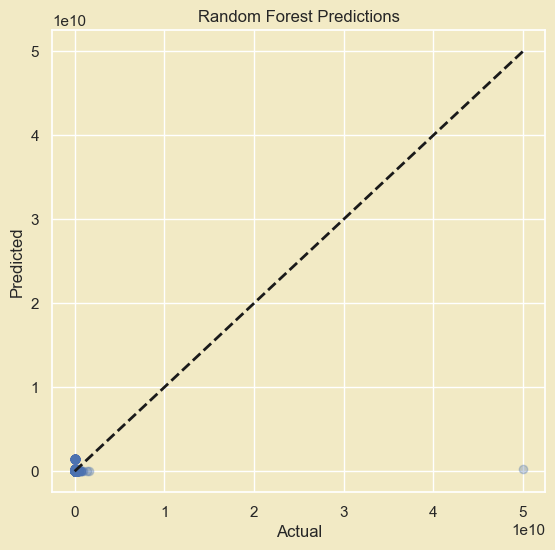

In [154]:
# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Predictions')

In [155]:
import re

def clean_names(df):
    """
    Cleans column names of a Pandas DataFrame by removing special characters,
    converting to lowercase, and replacing spaces with underscores.

    Args:
        df: Pandas DataFrame

    Returns:
        Pandas DataFrame with cleaned column names.
    """
    new_cols = []
    for col in df.columns:
        # Remove special characters
        col = re.sub(r'[^\w\s]', '', col)
        # Convert to lowercase
        col = col.lower()
        # Replace spaces with underscores
        col = col.replace(' ', '_')
        new_cols.append(col)
    df.columns = new_cols
    return df

X_categorical_df_clean = clean_names(X_categorical_df)

In [156]:
X_categorical_df_clean

,title,sol,department_indagency,subtier,fpds_code,office,aac_code,posteddate,type,basetype,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
NoticeId,,,,,,,,,,,,,,,,,,,,,
97ec6ab3d5d4454192a8828827de6f2f,131542,70597,13,186,196,2324,1787,321292,0,9,...,9129,469,3,10,762,214,53,1,191854,181742
c15a7148317b44eeac210a7b64068765,42182,181020,13,46,76,2110,2236,321291,4,8,...,9129,469,3,16,278,1237,53,1,244219,170500
bf103afa7b4b455bb1541eb450e38128,30643,70577,13,186,196,2324,1787,321290,0,0,...,9129,469,3,10,762,214,53,1,241349,43035
d1619b0084ac4d439585b727343b4659,80282,95574,13,47,62,1570,1910,321289,7,8,...,3709,469,3,55,94,1285,53,1,264397,132263
48b6b27846bd4155990cdc2f2be335c5,95524,70615,13,186,196,2324,1787,321288,0,0,...,9129,469,3,10,762,214,53,1,92327,191943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f5c5ffbcf544822897d81adf4d48a31,79949,94289,13,47,62,1276,1895,4,6,7,...,798,469,3,4,285,1220,53,1,201214,162902
2e2ab5512120475dba81379f508400d9,108244,181859,13,46,76,46,2427,3,1,1,...,9129,469,3,4,28,1214,53,1,58417,133793
bb24f68bc7e542c7bf1301c44fd0b1ff,85723,62104,13,45,99,619,1529,2,3,3,...,9129,469,3,21,474,831,53,1,236411,159248


In [157]:
df.columns

Index(['title', 'sol#', 'department_ind.agency', 'cgac', 'sub-tier',
       'fpds_code', 'office', 'aac_code', 'posteddate', 'type', 'basetype',
       'archivetype', 'archivedate', 'setasidecode', 'setaside',
       'responsedeadline', 'naicscode', 'classificationcode',
       'popstreetaddress', 'popcity', 'popstate', 'popzip', 'popcountry',
       'active', 'awardnumber', 'awarddate', 'award$', 'awardee',
       'primarycontacttitle', 'primarycontactfullname', 'primarycontactemail',
       'primarycontactphone', 'primarycontactfax', 'secondarycontacttitle',
       'secondarycontactfullname', 'secondarycontactemail',
       'secondarycontactphone', 'secondarycontactfax', 'organizationtype',
       'state', 'city', 'zipcode', 'countrycode', 'additionalinfolink', 'link',
       'description'],
      dtype='object')

In [158]:
df[["sub-tier"]].value_counts()

sub-tier
39          96540
47          50851
46          39661
185         30343
45          20825
            ...  
126             1
129             1
174             1
160             1
21              1
Name: count, Length: 188, dtype: int64

In [159]:
def clean_artists(artists_str):
    """
    Cleans the artists string by removing special characters and extra whitespace.
    Handles cases where artists_str might be a non-string type.
    """
    if not isinstance(artists_str, str):
        return ""  # Or handle the non-string case as needed
    cleaned_str = re.sub(r'[^\w\s]', '', artists_str)  # Remove special characters
    cleaned_str = ' '.join(cleaned_str.split())  # Remove extra whitespace
    return cleaned_str

# Apply the function to the 'artists' column
df['awarddate'] = df['awarddate'].apply(clean_artists)
df[["awarddate"]].value_counts()

awarddate
1006         255965
948             686
933             634
955             594
956             526
              ...  
638               1
318               1
529               1
77                1
999               1
Name: count, Length: 1007, dtype: int64

In [160]:
from sklearn.feature_extraction import FeatureHasher

In [161]:
h = FeatureHasher(n_features=10, input_type='string')

In [162]:
h

FeatureHasher(input_type='string', n_features=10)

In [163]:
# Cell 4: Define function to hash text features
def hash_text_features(df, columns):
    for col in columns:
        df[col] = df[col].apply(lambda x: hash(str(x)) % 10**8)  # Convert to string and hash
    return df


In [164]:
df2023.columns

Index(['title', 'sol#', 'department_ind.agency', 'cgac', 'sub-tier',
       'fpds_code', 'office', 'aac_code', 'posteddate', 'type', 'basetype',
       'archivetype', 'archivedate', 'setasidecode', 'setaside',
       'responsedeadline', 'naicscode', 'classificationcode',
       'popstreetaddress', 'popcity', 'popstate', 'popzip', 'popcountry',
       'active', 'awardnumber', 'awarddate', 'award$', 'awardee',
       'primarycontacttitle', 'primarycontactfullname', 'primarycontactemail',
       'primarycontactphone', 'primarycontactfax', 'secondarycontacttitle',
       'secondarycontactfullname', 'secondarycontactemail',
       'secondarycontactphone', 'secondarycontactfax', 'organizationtype',
       'state', 'city', 'zipcode', 'countrycode', 'additionalinfolink', 'link',
       'description'],
      dtype='object')

In [165]:
# Apply the function to the text columns
all_cols = df2023.columns
df_hashed = hash_text_features(df2023.copy(), all_cols)

In [166]:
df_hashed

,title,sol#,department_ind.agency,cgac,sub-tier,fpds_code,office,aac_code,posteddate,type,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
NoticeId,,,,,,,,,,,,,,,,,,,,,
97ec6ab3d5d4454192a8828827de6f2f,94427308,6895842,69853226,38231313,53208717,88237785,55463290,58076991,41785049,62049423,...,43034887,13570262,96859912,526449,75206358,38715978,31152529,55938220,39961813,42132969
c15a7148317b44eeac210a7b64068765,46568749,54353260,69853226,15637174,48502441,77904981,95817722,13439921,47675337,94522727,...,43034887,13570262,96859912,57377251,82782880,70225376,31152529,55938220,99784629,84184415
bf103afa7b4b455bb1541eb450e38128,28437472,68076583,69853226,38231313,53208717,88237785,55463290,58076991,66803661,62049423,...,43034887,13570262,96859912,526449,75206358,38715978,31152529,55938220,25809568,23894135
d1619b0084ac4d439585b727343b4659,38840613,73085600,69853226,93185901,36597875,4699131,24599976,28249082,86719939,48989710,...,40930698,13570262,96859912,8214289,8036504,51923810,31152529,55938220,86345732,75432592
48b6b27846bd4155990cdc2f2be335c5,96542758,99031294,69853226,38231313,53208717,88237785,55463290,58076991,94543711,62049423,...,43034887,13570262,96859912,526449,75206358,38715978,31152529,55938220,93767623,79094641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f5c5ffbcf544822897d81adf4d48a31,59680110,87625248,69853226,93185901,36597875,4699131,10240432,47604102,94522727,93829370,...,23929516,13570262,96859912,94522727,36260679,18189300,31152529,55938220,94706166,99056408
2e2ab5512120475dba81379f508400d9,24164413,77441840,69853226,15637174,48502441,77904981,48502441,94413783,96859912,55938220,...,43034887,13570262,96859912,94522727,54889455,28497748,31152529,55938220,63479969,18839606
bb24f68bc7e542c7bf1301c44fd0b1ff,94446766,66368489,69853226,43183183,68591156,45760292,77693587,98917903,67922027,96859912,...,43034887,13570262,96859912,27109283,14631801,19227228,31152529,55938220,3463262,3008160


In [167]:
# Cell 5: Normalize numerical columns
scaler = StandardScaler()
df_hashed[all_cols] = scaler.fit_transform(df_hashed[all_cols])

In [168]:
df_hashed

,title,sol#,department_ind.agency,cgac,sub-tier,fpds_code,office,aac_code,posteddate,type,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
NoticeId,,,,,,,,,,,,,,,,,,,,,
97ec6ab3d5d4454192a8828827de6f2f,1.554260,-1.495437,0.429855,-0.404832,0.815905,1.618688,0.157947,0.370853,-0.279986,-0.479162,...,-0.101770,-0.103394,0.086007,-1.205928,0.932867,-0.442364,-0.067109,-0.002488,-0.343150,-0.434893
c15a7148317b44eeac210a7b64068765,-0.097750,0.152350,0.429855,-1.243408,0.647741,1.299384,1.526897,-1.178271,-0.076100,1.351018,...,-0.101770,-0.103394,0.086007,0.610968,1.219000,0.618721,-0.067109,-0.002488,1.727604,0.913101
bf103afa7b4b455bb1541eb450e38128,-0.723616,0.628843,0.429855,-0.404832,0.815905,1.618688,0.157947,0.370853,0.586004,-0.479162,...,-0.101770,-0.103394,0.086007,-1.205928,0.932867,-0.442364,-0.067109,-0.002488,-0.833027,-1.019554
d1619b0084ac4d439585b727343b4659,-0.364515,0.802763,0.429855,1.634796,0.222370,-0.962826,-0.889034,-0.664321,1.275383,-1.215202,...,-0.267970,-0.103394,0.086007,-0.960232,-1.603856,0.002412,-0.067109,-0.002488,1.262419,0.632554
48b6b27846bd4155990cdc2f2be335c5,1.627283,1.703633,0.429855,-0.404832,0.815905,1.618688,0.157947,0.370853,1.546194,-0.479162,...,-0.101770,-0.103394,0.086007,-1.205928,0.932867,-0.442364,-0.067109,-0.002488,1.519326,0.749945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f5c5ffbcf544822897d81adf4d48a31,0.354836,1.307600,0.429855,1.634796,0.222370,-0.962826,-1.376155,0.007393,1.545467,1.311941,...,-1.610821,-0.103394,0.086007,1.798100,-0.537948,-1.133604,-0.067109,-0.002488,1.551814,1.389836
2e2ab5512120475dba81379f508400d9,-0.871116,0.954018,0.429855,-1.243408,0.647741,1.299384,-0.078187,1.631917,1.626366,-0.823587,...,-0.101770,-0.103394,0.086007,1.798100,0.165583,-0.786465,-0.067109,-0.002488,0.470926,-1.181581
bb24f68bc7e542c7bf1301c44fd0b1ff,1.554932,0.569535,0.429855,-0.221044,1.365547,0.306048,0.912069,1.788232,0.624715,1.482741,...,-0.101770,-0.103394,0.086007,-0.356367,-1.354779,-1.098651,-0.067109,-0.002488,-1.606540,-1.689071


In [169]:
# Replace empty strings with NaN for consistent handling
df_hashed.replace('', pd.NA, inplace=True)

# Create an Imputer instance with the desired strategy (e.g., 'mean', 'median')
imputer = SimpleImputer(strategy='mean')  # Choose an appropriate strategy

# Apply imputation to all numerical columns
df_hashed[all_cols] = imputer.fit_transform(df_hashed[all_cols])

# Normalize numerical columns
scaler = StandardScaler()
df_hashed[all_cols] = scaler.fit_transform(df_hashed[all_cols])

In [170]:
df_hashed.columns

Index(['title', 'sol#', 'department_ind.agency', 'cgac', 'sub-tier',
       'fpds_code', 'office', 'aac_code', 'posteddate', 'type', 'basetype',
       'archivetype', 'archivedate', 'setasidecode', 'setaside',
       'responsedeadline', 'naicscode', 'classificationcode',
       'popstreetaddress', 'popcity', 'popstate', 'popzip', 'popcountry',
       'active', 'awardnumber', 'awarddate', 'award$', 'awardee',
       'primarycontacttitle', 'primarycontactfullname', 'primarycontactemail',
       'primarycontactphone', 'primarycontactfax', 'secondarycontacttitle',
       'secondarycontactfullname', 'secondarycontactemail',
       'secondarycontactphone', 'secondarycontactfax', 'organizationtype',
       'state', 'city', 'zipcode', 'countrycode', 'additionalinfolink', 'link',
       'description'],
      dtype='object')

In [171]:
# Cell 6: Prepare target and features
X = df_hashed.drop(['sol#'], axis=1)  # Remove non-relevant and target columns
y = df_hashed['award$']  # Target variable

# Display the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (323030, 45)
Target shape: (323030,)


In [172]:
# Cell 7: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (258424, 45)
X_test shape: (64606, 45)
y_train shape: (258424,)
y_test shape: (64606,)


In [ ]:
# Cell 8: Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Cell 9: Make predictions and evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8.007358208810735e-08


In [ ]:
# Define prediction function to match provided columns
def predict_popularity(title, department_agency, cgac, sub_tier, fpds_code, office, aac_code, posted_date, contract_type, base_type, archive_type, archive_date, set_aside_code, set_aside, response_deadline, naics_code, classification_code, pop_street_address, pop_city, pop_state, pop_zip, pop_country, active, award_number, award_date, award_amount, awardee, primary_contact_title, primary_contact_fullname, primary_contact_email, primary_contact_phone, primary_contact_fax, secondary_contact_title, secondary_contact_fullname, secondary_contact_email, secondary_contact_phone, secondary_contact_fax, organization_type, state, city, zip_code, country_code, additional_info_link, link, description):

    # Hash specific text fields to match the model's expected input format
    title_hashed = hash(str(title)) % 10**8
    department_agency_hashed = hash(str(department_agency)) % 10**8
    sub_tier_hashed = hash(str(sub_tier)) % 10**8
    awardee_hashed = hash(str(awardee)) % 10**8

    # Create a DataFrame for the input, matching the column names in X
    input_data = pd.DataFrame([[
        title_hashed, department_agency_hashed, cgac, sub_tier_hashed, fpds_code,
        office, aac_code, posted_date, contract_type, base_type, archive_type, archive_date,
        set_aside_code, set_aside, response_deadline, naics_code, classification_code,
        pop_street_address, pop_city, pop_state, pop_zip, pop_country, active,
        award_number, award_date, award_amount, awardee_hashed, primary_contact_title,
        primary_contact_fullname, primary_contact_email, primary_contact_phone,
        primary_contact_fax, secondary_contact_title, secondary_contact_fullname,
        secondary_contact_email, secondary_contact_phone, secondary_contact_fax,
        organization_type, state, city, zip_code, country_code, additional_info_link,
        link, description
    ]], columns=X.columns)

    # Define numeric columns, if any, to normalize
    # (Assume 'award_amount' as a numerical example, modify as needed based on your data)
    numerical_cols = ['award_amount']
    input_data[numerical_cols] = (input_data[numerical_cols] - X[numerical_cols].mean()) / X[numerical_cols].std()

    # Return the DataFrame ready for prediction
    return input_data


In [ ]:
X_train.dtypes.to_frame('Data Type')

,Data Type
title,float64
department_ind.agency,float64
cgac,float64
sub-tier,float64
fpds_code,float64
office,float64
aac_code,float64
posteddate,float64
type,float64
basetype,float64


In [ ]:
X_train

,title,department_ind.agency,cgac,sub-tier,fpds_code,office,aac_code,posteddate,type,basetype,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
NoticeId,,,,,,,,,,,,,,,,,,,,,
f3a5c773ac244c10ae16523c933f863c,0.762506,0.330817,-1.385261,-0.551425,-1.024434,-1.006309,-1.165273,-1.490878,1.351018,1.514309,...,0.104953,-0.103394,0.086007,-1.205928,0.932867,-1.224673,-0.067109,-0.002488,-0.375517,0.879534
61e0269d814d4167943d31926b794b1c,1.601903,-0.283754,-1.436303,2.375640,0.922095,-0.878987,-1.171446,-0.473570,1.311941,1.514309,...,0.302732,-0.103394,0.086007,0.199911,1.424236,1.321360,-7.116181,-0.002488,-0.314650,-1.329934
ab88af486abb4d838059fce5ef64e6b6,0.759490,0.429855,1.634796,0.222370,-0.962826,-1.599170,-1.501085,-0.334160,1.311941,-0.516829,...,-0.101770,-0.103394,0.086007,-0.573055,-0.550005,0.670996,-0.067109,-0.002488,-1.396397,1.087591
7fa0e42774da471b8673ea5f8a61c0fa,-0.512938,-0.337538,1.434647,0.211943,1.447669,0.483645,-0.388692,1.381806,-0.479162,-0.154641,...,-3.267551,-0.103394,0.086007,1.405958,0.720374,-0.328219,-0.067109,-0.002488,1.098763,0.967405
8a3ed7cabe3b4044bf81958ad40ce8bd,0.957595,0.429855,-0.404832,-1.047446,-0.955808,-0.680109,1.770577,-1.236811,-0.823587,-0.154641,...,-0.101770,-0.103394,0.086007,0.955193,-1.003700,-0.440473,-0.067109,-0.002488,-1.369994,0.495125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a7dfb450ffc548ff8a42298628a68a4e,0.313934,0.429855,-0.404832,-1.047446,-0.955808,1.506922,1.686900,1.141374,-0.823587,-0.154641,...,-0.101770,-0.103394,0.086007,0.744565,0.694223,-0.700598,-0.067109,-0.002488,-1.283711,0.579392
0fe2689ea2ff4ea5b2439fba70946b90,-0.671729,0.429855,1.634796,0.222370,-0.962826,1.153813,-0.088533,1.223443,1.311941,-0.516829,...,-0.101770,-0.103394,0.086007,-0.573055,1.689034,-0.667539,-0.067109,-0.002488,1.340646,-0.694099
9b693dc08c9646bf8cbaf9ed06d5dd27,-0.931161,-2.648365,0.005072,1.609419,1.089135,-0.994400,-1.111661,-0.956824,-0.823587,-0.154641,...,-0.101770,-0.103394,0.086007,-0.053121,1.135933,1.223758,-0.067109,-0.002488,0.964417,-1.710245


In [ ]:
# Missing values in each row
missing_values_per_row = X_train.isnull().sum(axis=1)
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')

total_rows_with_missing_values = (X_train.isnull().any(axis=1)).sum()
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

258424 row(s) have 0 missing values
Total number of rows with missing values: 0


In [ ]:
dist_numerical_cols = X_train.describe().T[['min', 'max']]
dist_numerical_cols['Missing Values'] = X_train.isnull().sum()
dist_numerical_cols['Missing Percentage'] = (X_train.isnull().mean() * 100).round(2)

The output shows that all numeric columns have a missing value percentage of 0, indicating that **there are no missing values** in these columns.

To gain further insights into the data, we used the `describe()` method to generate a comprehensive statistical summary of the numerical columns.

In [ ]:
X_train.describe()

,title,department_ind.agency,cgac,sub-tier,fpds_code,office,aac_code,posteddate,type,basetype,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
count,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,...,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000,258424.000000
mean,-0.000536,0.000640,-0.000159,-0.000321,-0.000203,-0.000300,0.000175,-0.000093,0.000272,-0.000452,...,0.001817,-0.000382,0.000923,0.001110,0.000736,-0.000138,-0.000397,0.000622,-0.001408,-0.001196
std,0.999836,0.999673,0.999883,1.000022,0.999848,1.000449,1.000276,0.999708,0.999988,1.000256,...,1.000907,0.997727,0.993575,1.000257,1.000130,1.000355,0.998614,1.118035,1.000430,1.000188
min,-1.705218,-3.145020,-1.608243,-1.080156,-1.103558,-1.721252,-1.642358,-1.726306,-1.215202,-2.917365,...,-3.499837,-2.289510,-13.509056,-1.218119,-1.901885,-1.743858,-14.450194,-0.002488,-1.726403,-1.785482
25%,-0.871939,0.429855,-0.404832,-1.047446,-0.955808,-0.656036,-0.872623,-0.863394,-0.823587,-0.516829,...,-0.101770,-0.103394,0.086007,-1.161811,-0.588179,-0.700598,-0.067109,-0.002488,-0.866483,-0.871097
50%,-0.004342,0.429855,-0.404832,0.222370,-0.308150,-0.209523,-0.088533,-0.001788,-0.479162,-0.154641,...,-0.101770,-0.103394,0.086007,-0.053121,-0.372953,-0.265307,-0.067109,-0.002488,-0.001409,0.020104
75%,0.852518,0.429855,1.137567,0.647741,1.089135,1.009377,0.973471,0.865358,1.311941,0.163903,...,-0.101770,-0.103394,0.086007,0.947968,0.765790,1.120954,-0.067109,-0.002488,0.864923,0.946123
max,1.746609,1.814850,1.851750,2.464890,1.962316,1.667456,1.824439,1.735044,1.482741,1.978386,...,4.395812,13.868329,0.086007,1.872795,1.859418,1.620080,30.411771,401.888044,1.735042,1.420071


**👉 Distribution of numerical columns**

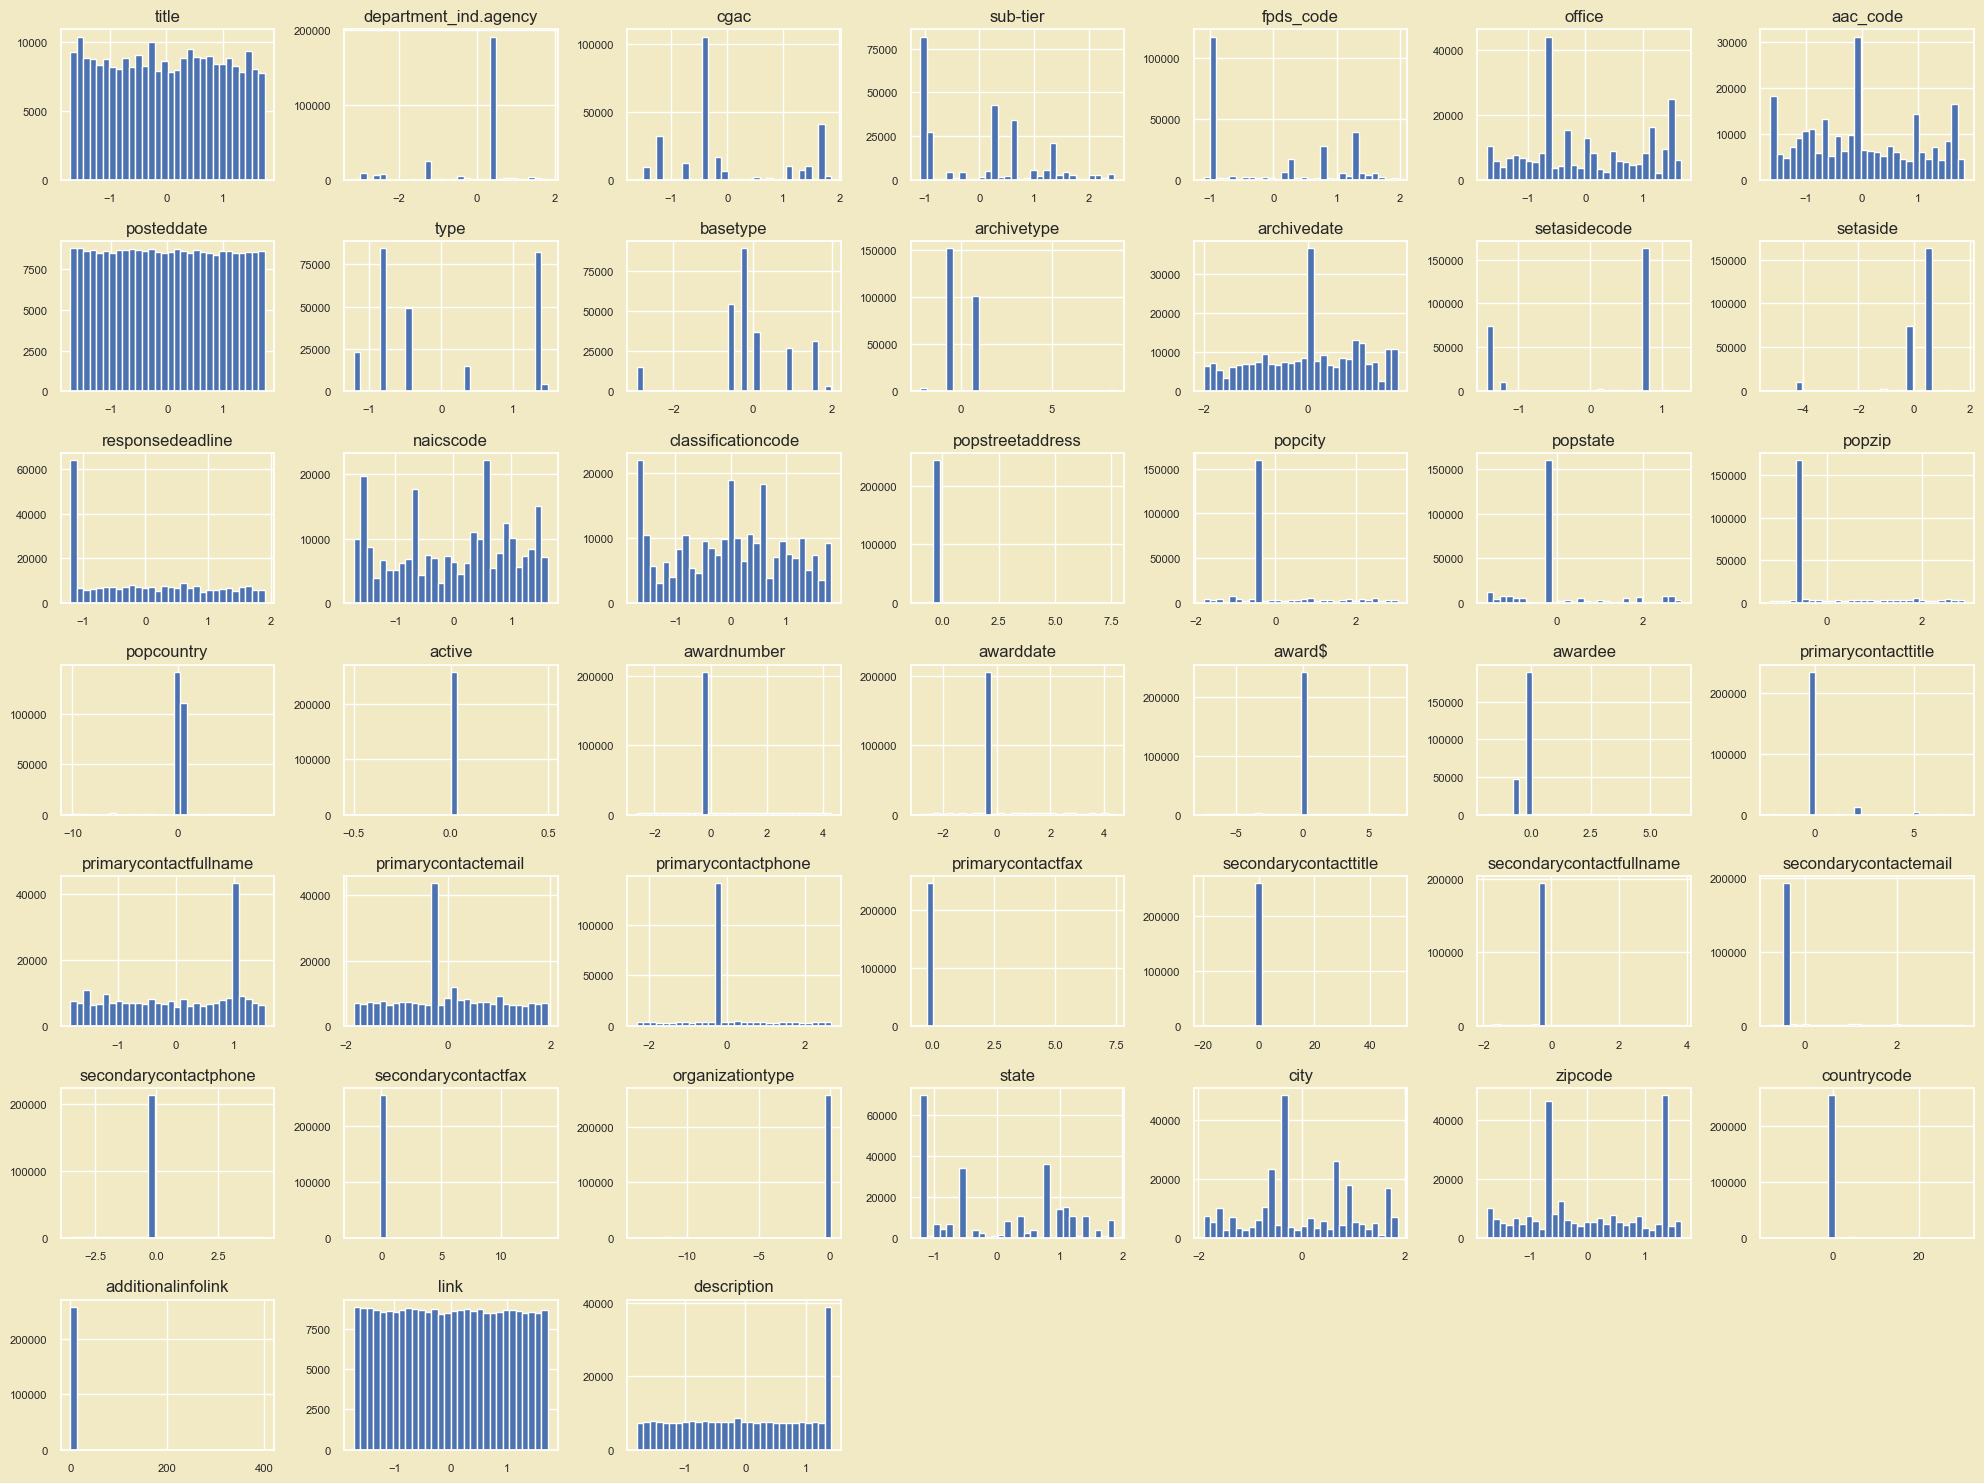

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
X_train.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()


<a class = "anchor" id = "3"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3. Abnormal values and outliers </div>

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258424 entries, f3a5c773ac244c10ae16523c933f863c to 8d86f84fe2be4b599e6faf5c50cae0b6
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   title                     258424 non-null  float64
 1   department_ind.agency     258424 non-null  float64
 2   cgac                      258424 non-null  float64
 3   sub-tier                  258424 non-null  float64
 4   fpds_code                 258424 non-null  float64
 5   office                    258424 non-null  float64
 6   aac_code                  258424 non-null  float64
 7   posteddate                258424 non-null  float64
 8   type                      258424 non-null  float64
 9   basetype                  258424 non-null  float64
 10  archivetype               258424 non-null  float64
 11  archivedate               258424 non-null  float64
 12  setasidecode              258424 non-null  float

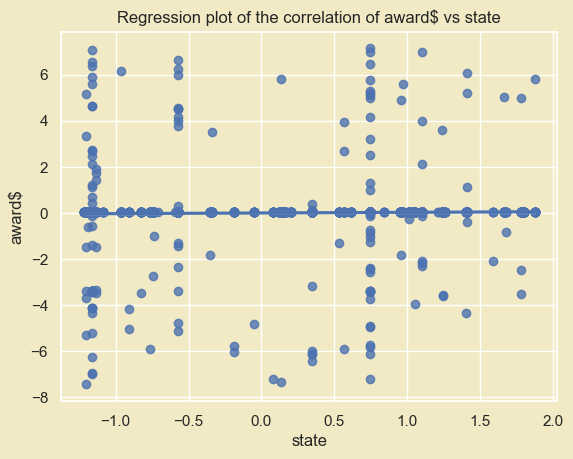

In [ ]:
sample = X_train.sample(int(0.01 * len(X_train)))
sns.regplot(data=sample, y="award$", x="state", color="b")
plt.title("Regression plot of the correlation of award$ vs state")
plt.show()

In [ ]:
avg_popularity_byzipcode = X_train.groupby('cgac')['award$'].mean().reset_index()
top3_popular_byzipcode = avg_popularity_byzipcode.nlargest(13, 'award$')
top3_popular_byzipcode

,cgac,award$
35,0.076086,1.163785
29,0.002285,0.306127
8,-1.247775,0.213758
42,0.563253,0.120472
38,0.380009,0.087645
36,0.147055,0.084583
34,0.058056,0.082181
20,-0.459224,0.073233
45,0.711051,0.060894
10,-1.209875,0.055936


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assuming X_train and y_train are already defined
# X_train should be your feature matrix and y_train should be the target variable (award amounts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f"Random Forest MSE: {rf_mse}, R2: {rf_r2}")
print(f"Ridge Regression MSE: {ridge_mse}, R2: {ridge_r2}")


Random Forest MSE: 1.2709661254334737e-07, R2: 0.999999872503104
Ridge Regression MSE: 2.350451187561329e-11, R2: 0.9999999999764214


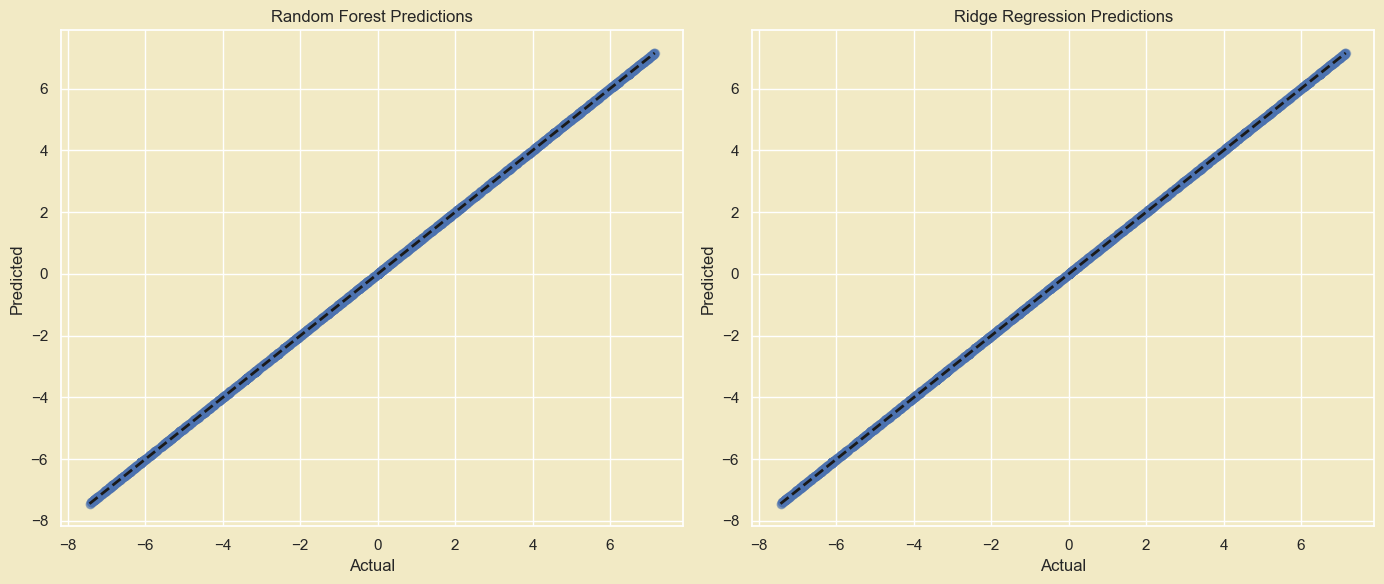

In [ ]:

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Predictions')

plt.subplot(1, 2, 2)
plt.scatter(y_test, ridge_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predictions')

plt.tight_layout()
plt.show()

In [ ]:
top3_genre_data = X_train[X_train['cgac'].isin(top3_popular_byzipcode['cgac'])]
top3_genre_data

,title,department_ind.agency,cgac,sub-tier,fpds_code,office,aac_code,posteddate,type,basetype,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
NoticeId,,,,,,,,,,,,,,,,,,,,,
2d3b254177434159913512436a90e84f,1.456698,1.872190,0.723008,0.970059,0.320929,1.774111,0.799755,1.083166,-3.016426,-2.843451,...,0.320208,0.089089,-0.068569,1.274993,1.143157,0.506562,-0.082354,0.0,-0.517164,0.826322
24f9e441745343959d28dc3db4ab609c,1.513874,-2.875718,0.727687,-1.015657,0.529596,0.576159,0.530570,-1.456618,-0.112963,-0.037151,...,-0.107433,0.089089,-0.068569,1.274993,1.143157,0.504294,-0.082354,0.0,-0.666055,-0.911448
28a4060523d74004b90aeb6bc3717afb,-1.441941,-2.462833,-0.128777,-0.842976,-0.495628,-0.332184,1.817022,1.336266,-0.112963,-0.037151,...,0.320208,0.089089,-0.068569,-0.071498,1.153191,1.530424,-0.082354,0.0,0.894382,0.669246
fdcf8dbb72594091b0b78b393268262b,0.019755,-3.065473,0.331152,-1.095018,-1.350183,-0.065153,0.944428,-0.556669,-3.016426,-2.843451,...,0.320208,0.089089,-0.068569,0.446568,0.410727,0.361596,-0.082354,0.0,1.440658,0.229538
56abc6cc235648eb8b6a21fd2e1f317c,-0.467729,-2.462833,-0.128777,-0.842976,-0.495628,0.960464,-0.646701,1.220654,-0.112963,-0.037151,...,0.320208,0.089089,-0.068569,-0.614446,0.576182,-0.733016,-0.082354,0.0,1.565963,-1.753357
a2fbecb2d902497d82841aa776d5efe4,-0.608737,-2.462833,-0.128777,-0.842976,-0.495628,2.176447,-0.700202,-1.644128,-3.016426,-2.843451,...,0.320208,0.089089,-0.068569,-1.672075,-0.970258,1.513438,-0.082354,0.0,1.675856,-0.353218
ceedc382066d4a469c1484c7a4816c83,-1.160022,-3.099091,-1.963042,-1.109078,0.525245,-0.373341,-1.099527,1.697883,-0.112963,-0.037151,...,0.320208,0.089089,-0.068569,1.274993,1.143157,0.693184,-0.082354,0.0,-0.359465,-0.936814
cccb1d3214304bdb9e940dd4c62ac271,1.513874,-2.875718,0.727687,-1.015657,0.529596,0.576159,0.530570,-0.998813,-0.112963,-0.037151,...,-0.107433,0.089089,-0.068569,1.274993,1.143157,0.504294,-0.082354,0.0,-0.286471,-0.911448
796f92be9f504dae823b1d6bbd2598b2,-1.560305,-2.462833,-0.128777,-0.842976,-0.495628,0.960464,-0.646701,-0.195140,-0.112963,-0.037151,...,0.320208,0.089089,-0.068569,-0.614446,0.576182,-0.733016,-0.082354,0.0,-0.462340,-1.916196


🖥️ We use `matplotlib_venn` to plot the venn diagrams so we need to install it first (if not already installed).

In [ ]:
!pip install matplotlib_venn hnswlib --quiet

In [ ]:
X_train.drop_duplicates(subset=['awardee'], inplace=True)
X_train.head(5)

,title,department_ind.agency,cgac,sub-tier,fpds_code,office,aac_code,posteddate,type,basetype,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
NoticeId,,,,,,,,,,,,,,,,,,,,,
6bc58d6c27164d1a91918abafd9419d6,-1.317745,0.429855,-0.404832,-1.047446,-0.955808,-0.306763,0.275504,1.141253,-0.479162,0.163903,...,-0.101770,-0.103394,0.086007,-0.573055,-0.550005,-0.460073,-0.067109,-0.002488,-1.350829,1.354410
120bde9a9a8344c7a7f56fa8a12e31eb,-0.138692,0.429855,-0.221044,1.365547,0.306048,-1.667540,0.302159,0.475079,0.377238,-2.917365,...,-1.675986,-0.103394,0.086007,1.399395,-0.626515,1.269757,-0.067109,-0.002488,0.256733,0.895711
ebfa838076814f6a8367663be9d1aef8,0.475857,0.429855,-0.404832,2.225388,-0.293604,0.403731,0.449778,-1.142641,-0.479162,-0.154641,...,-0.101770,-0.103394,0.086007,0.342910,-1.629749,0.591703,-0.067109,-0.002488,-1.115362,1.354410
a16edde07b6d4ed59e1ff705bb2f03ec,1.266731,0.429855,-0.404832,-1.047446,-0.955808,0.114688,-0.144197,-1.228692,-0.479162,-0.516829,...,-0.101770,-0.103394,0.086007,-0.960232,-1.603856,0.493703,-0.067109,-0.002488,0.546521,1.354410
d1ca70e00e8d4932a9a00141633ec1e5,-0.282957,0.429855,1.634796,0.222370,-0.962826,-1.024066,1.643436,-1.453584,-0.479162,0.163903,...,-0.101770,-0.103394,0.086007,0.342910,-1.629749,-0.050223,-0.067109,-0.002488,1.107555,0.818386


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
numerical_cols = X_train.select_dtypes(include=np.number).columns

In [ ]:
X_train

,title,department_ind.agency,cgac,sub-tier,fpds_code,office,aac_code,posteddate,type,basetype,...,secondarycontactphone,secondarycontactfax,organizationtype,state,city,zipcode,countrycode,additionalinfolink,link,description
NoticeId,,,,,,,,,,,,,,,,,,,,,
6bc58d6c27164d1a91918abafd9419d6,-1.317745,0.429855,-0.404832,-1.047446,-0.955808,-0.306763,0.275504,1.141253,-0.479162,0.163903,...,-0.101770,-0.103394,0.086007,-0.573055,-0.550005,-0.460073,-0.067109,-0.002488,-1.350829,1.354410
120bde9a9a8344c7a7f56fa8a12e31eb,-0.138692,0.429855,-0.221044,1.365547,0.306048,-1.667540,0.302159,0.475079,0.377238,-2.917365,...,-1.675986,-0.103394,0.086007,1.399395,-0.626515,1.269757,-0.067109,-0.002488,0.256733,0.895711
ebfa838076814f6a8367663be9d1aef8,0.475857,0.429855,-0.404832,2.225388,-0.293604,0.403731,0.449778,-1.142641,-0.479162,-0.154641,...,-0.101770,-0.103394,0.086007,0.342910,-1.629749,0.591703,-0.067109,-0.002488,-1.115362,1.354410
a16edde07b6d4ed59e1ff705bb2f03ec,1.266731,0.429855,-0.404832,-1.047446,-0.955808,0.114688,-0.144197,-1.228692,-0.479162,-0.516829,...,-0.101770,-0.103394,0.086007,-0.960232,-1.603856,0.493703,-0.067109,-0.002488,0.546521,1.354410
d1ca70e00e8d4932a9a00141633ec1e5,-0.282957,0.429855,1.634796,0.222370,-0.962826,-1.024066,1.643436,-1.453584,-0.479162,0.163903,...,-0.101770,-0.103394,0.086007,0.342910,-1.629749,-0.050223,-0.067109,-0.002488,1.107555,0.818386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0718eedd42b34a719482a13f271eb225,-0.498109,0.429855,-0.221044,1.365547,0.306048,-0.509565,0.824666,-0.486253,-0.479162,-0.516829,...,3.608047,3.621648,0.086007,1.798100,0.165583,1.514824,-0.067109,-0.002488,-1.415695,-0.203109
47f070d3f9034a0b90152b06729a364e,-0.787243,0.429855,-0.404832,-0.541683,1.058641,-0.206404,0.688819,-0.142163,-0.479162,0.163903,...,-2.234776,-0.103394,0.086007,0.744565,-1.811058,-0.880719,-0.067109,-0.002488,1.348998,0.721201
b3d5caadf89f42659dbb9db05614a8a8,1.161514,1.358262,1.409225,-0.849542,-0.662409,-0.755253,-1.253547,1.547744,-0.479162,-0.154641,...,-0.101770,-0.103394,0.086007,0.146758,0.573383,0.823167,-0.067109,-0.002488,-1.007232,1.354410


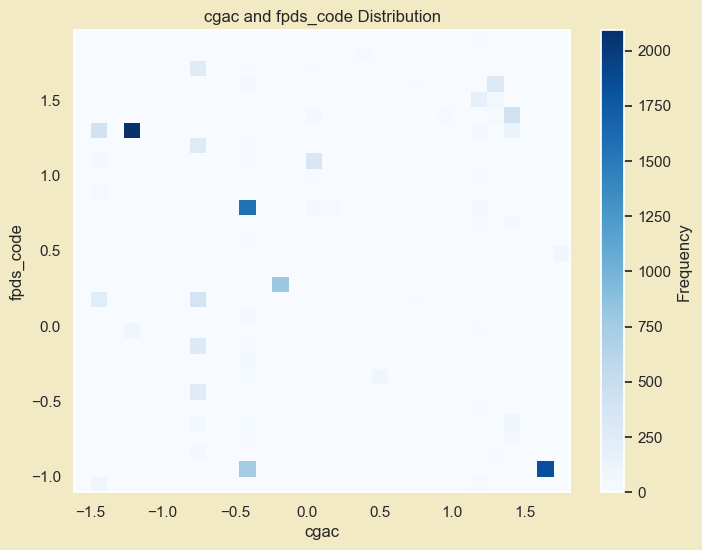

In [ ]:
# @title Energy and Loudness Distribution
plt.figure(figsize=(8, 6))
plt.hist2d(X_train['cgac'], X_train['fpds_code'], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('cgac and fpds_code Distribution')
plt.xlabel('cgac')
_ = plt.ylabel('fpds_code')

In [ ]:

# Plot ROC curve for Random Forest (assuming binary classification for AUC)
fpr, tpr, _ = roc_curve(y_test, rf_predictions)
roc_auc = roc_auc_score(y_test, rf_predictions)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Plot ROC curve for Ridge Regression (assuming binary classification for AUC)
fpr, tpr, _ = roc_curve(y_test, ridge_predictions)
roc_auc = roc_auc_score(y_test, ridge_predictions)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Ridge Regression')
plt.legend(loc="lower right")
plt.show()